0. Se procede con la carga de las librerías de trabajo

In [ ]:
import numpy as np #Funciones matemáticas
import pandas as pd #Comunicación con excel
from sklearn.naive_bayes import GaussianNB #Función Gaussiana
from sklearn.metrics import confusion_matrix #Métrica de medida
import matplotlib.pyplot as plt
import seaborn as sns

#Prestamo interbibliotecario.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

1. Se cargan los datos

      age      wtkg  homo  drugs  race  gender  symptom  infected
0      48   89.8128     0      0     0       0        0         0
1      61   49.4424     0      0     0       0        0         1
2      45   88.4520     1      1     0       1        0         0
3      47   85.2768     1      0     0       1        0         0
4      43   66.6792     1      0     0       1        0         0
...   ...       ...   ...    ...   ...     ...      ...       ...
2134   21   53.2980     0      0     0       1        0         0
2135   17  102.9672     0      0     1       1        0         0
2136   53   69.8544     1      0     1       1        0         0
2137   14   60.0000     0      0     0       1        0         1
2138   45   77.3000     0      0     0       1        0         0

[2139 rows x 8 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


esta es la matriz de correlación:
                age      wtkg      homo     drugs      race    gender  \
age       1.000000  0.132858  0.158917  0.077446 -0.097678  0.048705   
wtkg      0.132858  1.000000  0.155909  0.002343 -0.081452  0.240013   
homo      0.158917  0.155909  1.000000 -0.206876 -0.307108  0.607820   
drugs     0.077446  0.002343 -0.206876  1.000000  0.082311 -0.141748   
race     -0.097678 -0.081452 -0.307108  0.082311  1.000000 -0.292146   
gender    0.048705  0.240013  0.607820 -0.141748 -0.292146  1.000000   
symptom   0.032814  0.003942  0.118575  0.027052 -0.078378  0.064373   
infected  0.070384  0.016205  0.054279 -0.049794 -0.055977  0.045118   

           symptom  infected  
age       0.032814  0.070384  
wtkg      0.003942  0.016205  
homo      0.118575  0.054279  
drugs     0.027052 -0.049794  
race     -0.078378 -0.055977  
gender    0.064373  0.045118  
symptom   1.000000  0.129234  
infected  0.129234  1.000000  


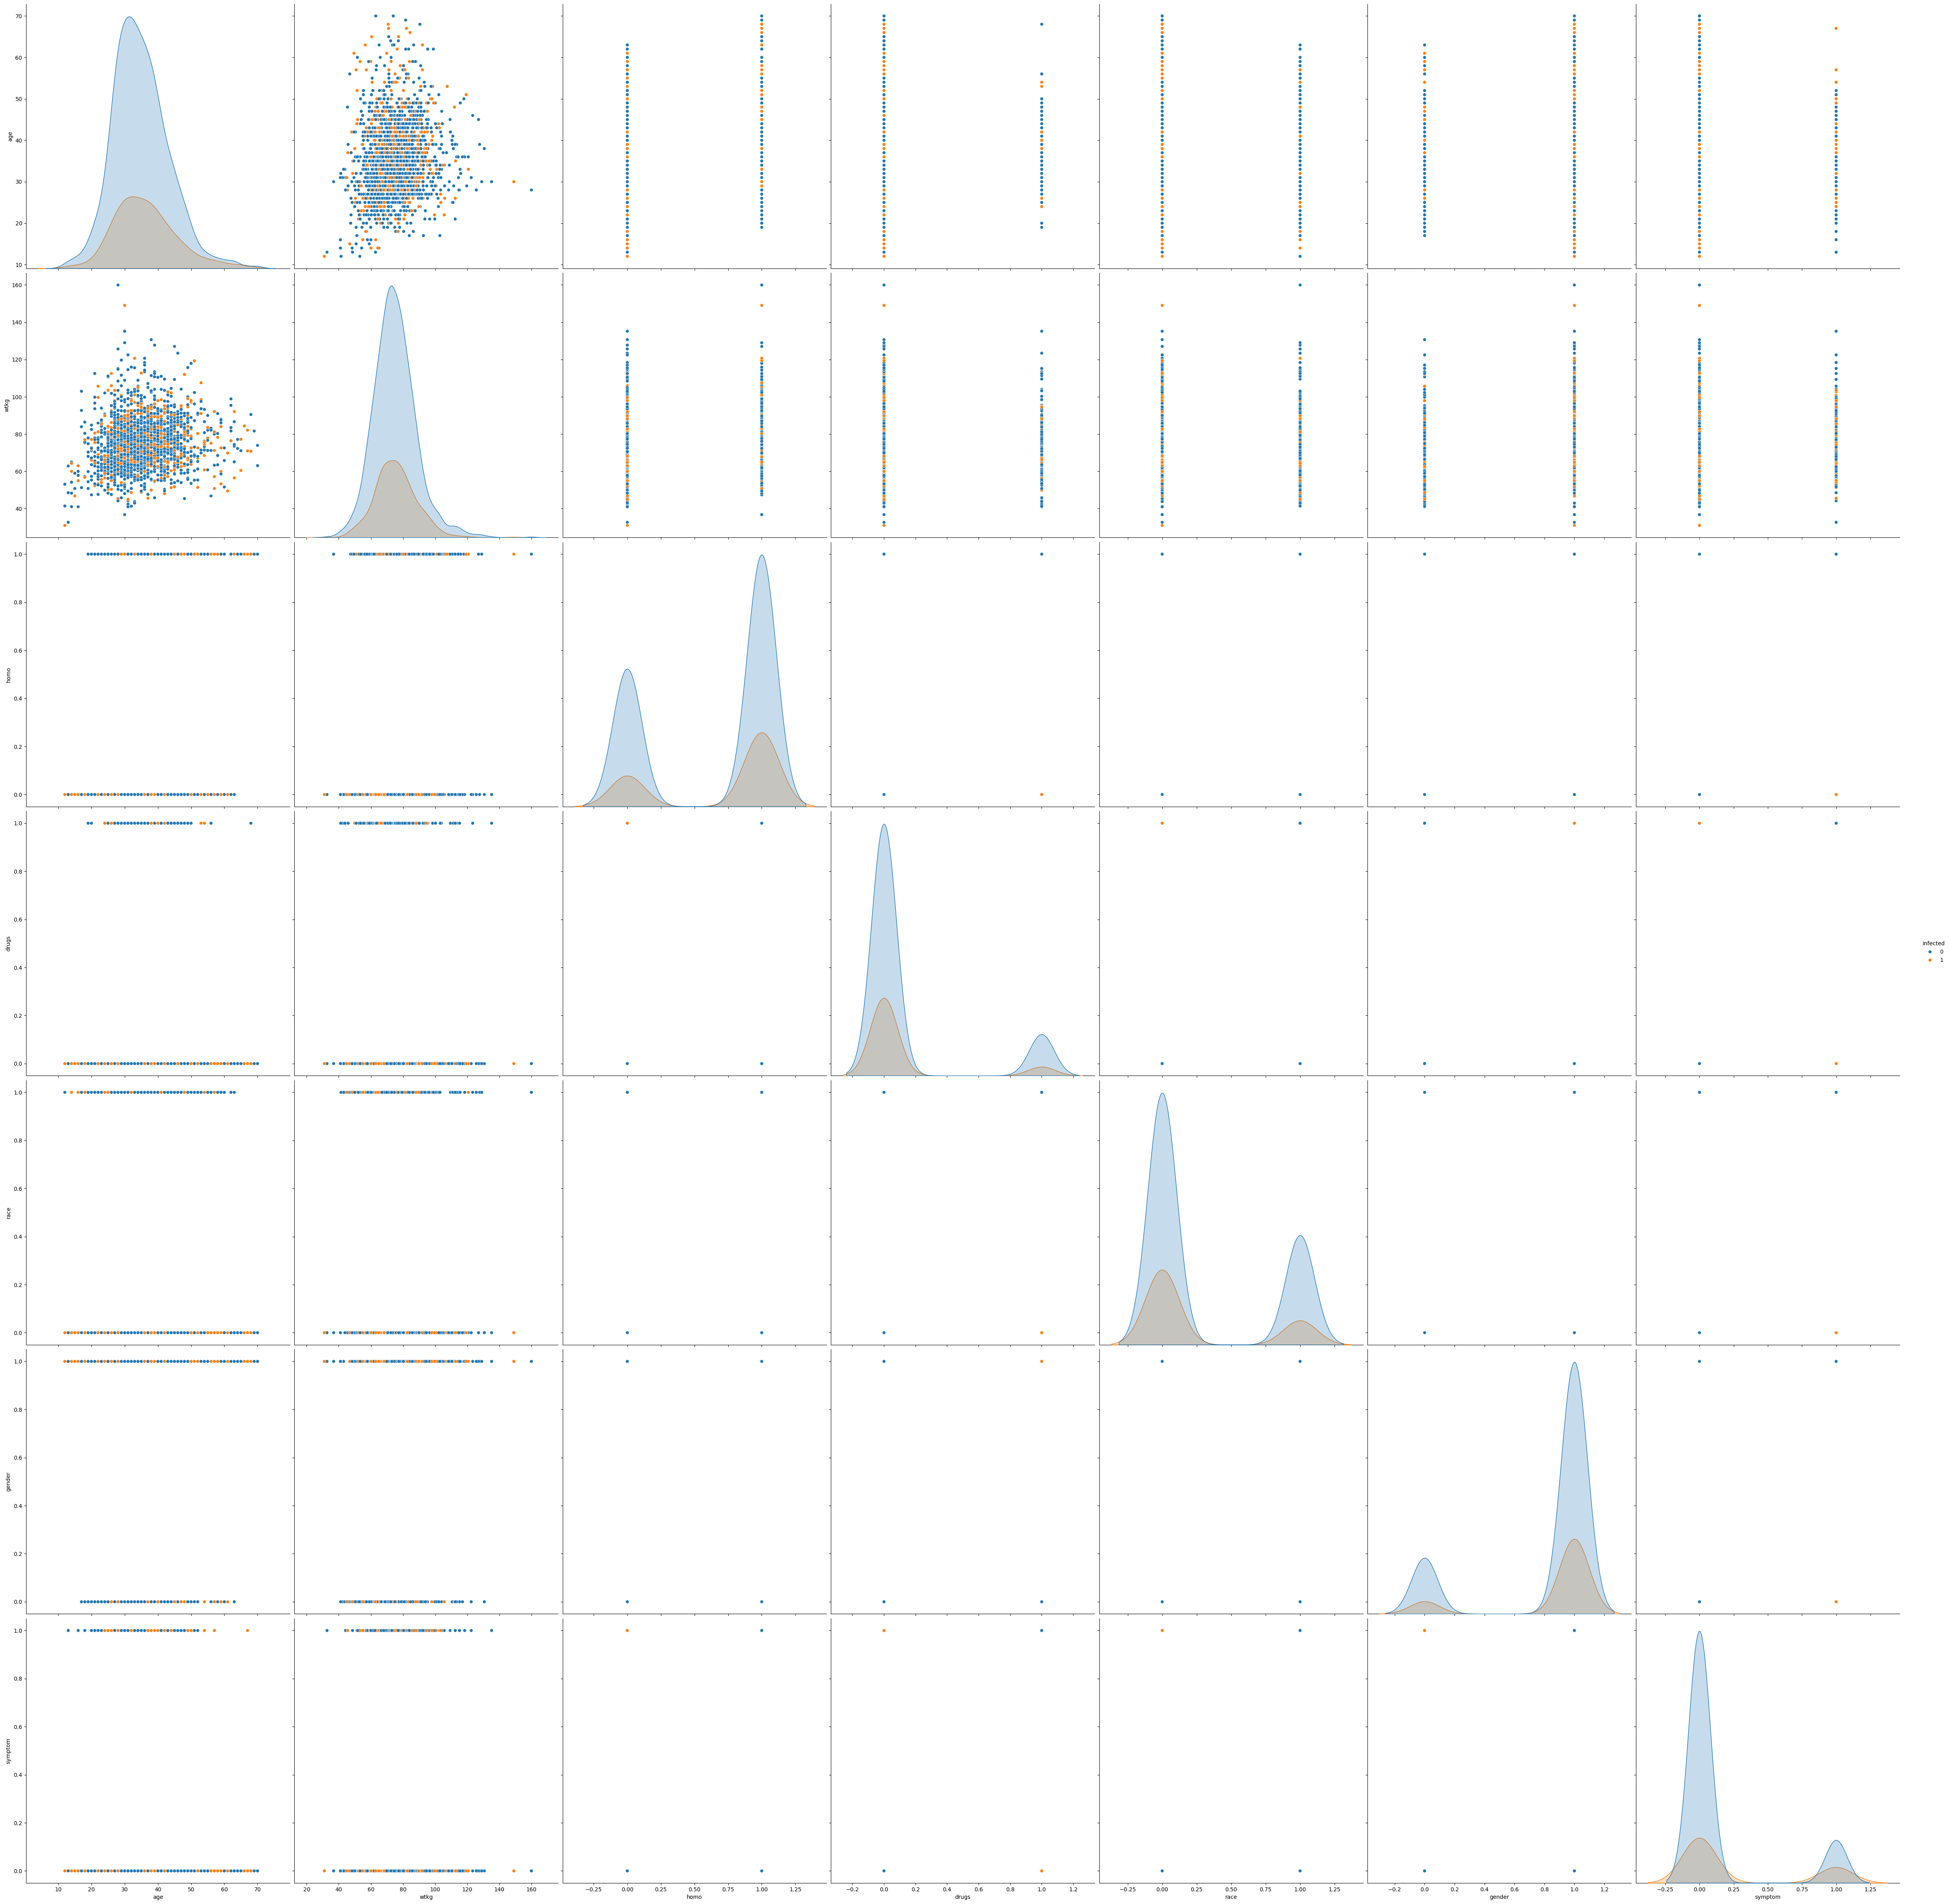

In [ ]:
nxl='/content/AIDS_Classification.csv.xls'
XDB=pd.read_csv(nxl) #Traigo los datos

#Seleccionamos las variables de interés
XDB=XDB[['age','wtkg','homo','drugs','race','gender','symptom','infected']]
print(XDB) #Mostrar la base de datos de Referencia

#Datos de Entrada - np.array() - Convertir a números
XD=np.array(XDB[['age','wtkg','homo','drugs','race','gender','symptom','infected']])
#Datos de Salida - Valor deseado - Qué quiero que aprenda el modelo
yd=XDB['infected']

sns.pairplot(XDB, hue='infected', size=7, vars=['age','wtkg','homo','drugs','race','gender','symptom'])
#los azules son los creditos negados y los amarillos los Enroll, entre más separadas mejores para separar los datos

#para confirmar la buena correlación
corr = XDB.corr()
print("esta es la matriz de correlación:\n",corr)

#Se procede con la configuración de datos de entrada y datos de salida.

XD=np.array(XDB.iloc[:,0:7]) #Tomas las variables de entrada
YD=XDB.iloc[:,7]


2. Naive Bayes

In [ ]:
mnb=GaussianNB() #Llamamos el modelo
mnb.fit(XD,yd)
ydp=mnb.predict(XD) #Muestra los datos de salida - pero que él obtuvo

#Dígame las medias de las variables para cada categoría - PreApr/PreNeg
u=mnb.theta_ #Se estiman las medidas
sigma=np.sqrt(mnb.var_) #Se estiman las desviaciones

#Las variaciones de las variables
LI=u-sigma
LS=u+sigma

print('La media de las variables por categoría:')
print(u)
print('El límite inferior de la variación de las variables por categoría es:')
print(LI)
print('El límite superior de la variación de las variables por categoría es:')
print(LS)

#Métrica de evaluación - Cómo se comportó el modelo indentificando la PreApr-PreNeg
cm=confusion_matrix(yd,ydp)


La media de las variables por categoría:
[[34.90049444 75.00337913  0.64647713  0.14091471  0.30284302  0.81829419
   0.14524104]
 [36.32821497 75.50397651  0.70633397  0.10172745  0.243762    0.85796545
   0.25911708]]
El límite inferior de la variación de las variables por categoría es:
[[26.45840714 61.67272949  0.16841372 -0.20701909 -0.15664507  0.43269208
  -0.20710291]
 [26.92726397 62.47283083  0.25089301 -0.2005624  -0.18558898  0.50887963
  -0.17903312]]
El límite superior de la variación de las variables por categoría es:
[[43.34258174 88.33402878  1.12454054  0.48884851  0.7623311   1.2038963
   0.49758498]
 [45.72916597 88.53512219  1.16177493  0.40401729  0.67311297  1.20705127
   0.69726728]]


3. Se procede con la evaluación del Naive bayes

In [ ]:
VN=cm[0,0] #Verdaderos Negativos
FP=cm[0,1] #Falsos Positivos
FN=cm[1,0] #Falsos Negativos
VP=cm[1,1] #Verdaderos Positivos

Exactitud=(VP+VN)/len(XD)
print('La exactitud del modelo es:', Exactitud) #Comportamiento General

TE=(FP+FN)/len(XD)
print('La tasa de error del modelo es:', TE) #Porcentaje Equivocaciones

Sensibilidad=VP/(VP+FP)
print('La sensibilidad del modelo es:', Sensibilidad) #Cómo se comórtó frente a los positivos

Especificidad=VN/(VN+FN)
print('La especificidad del modelo es:', Especificidad) #Cómo se comórtó frente a los negativos

Precisión=VP/(VP+VN)
print('La precisión del modelo es:', Precisión) #Cómo le pegó a los positivos

PredNeg=VN/(VN+FP)
print('La probabilidad de Negativo del modelo es:', PredNeg) #Cómo le pegó a los clasificados negativos


La exactitud del modelo es: 0.7213651238896681
La tasa de error del modelo es: 0.27863487611033194
La sensibilidad del modelo es: 0.3786407766990291
La especificidad del modelo es: 0.7792349726775957
La precisión del modelo es: 0.07582631237848347
La probabilidad de Negativo del modelo es: 0.8813349814585909


4. Persona hipotética Naive Bayes

In [ ]:
Xun=np.array([[34,66.6792,0,1,0,1,1]]) #Esta es la persona del Excel
ydun=mnb.predict(Xun)
print(ydun)

[0]


5. KNN

esta es la matriz de confusión:
 [[1593   25]
 [ 491   30]]
Exactitud: 0.758765778401122
Sensibilidad: 0.05758157389635317
Especificidad: 0.984548825710754
El sujeto tiene sida?: [0]


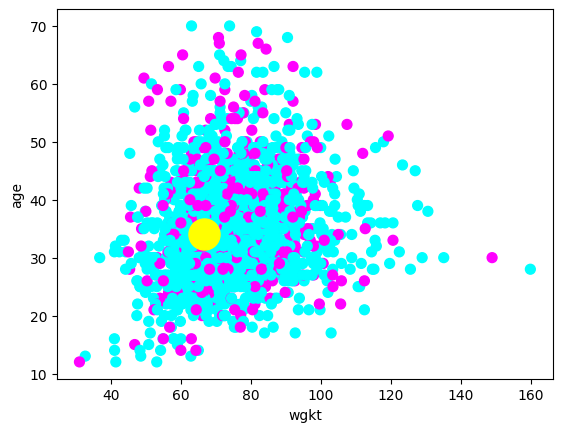

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10) #Tomar 10 vecinos
mknn.fit(XD,YD) #Se ajusta el modelo


#Evaluacion del funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusión.

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(YD,ydp)
print("esta es la matriz de confusión:\n",cm)

VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]
Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Spec=VN/(VN+FP)
print("Exactitud:",Exac)
print("Sensibilidad:",Sen)
print("Especificidad:",Spec)


#Las gráficas siempre se hacen con las variables que tiene más correlación.
XDP=np.array([[34,66.6792,0,1,0,1,1]])
ypdp=mknn.predict(XDP)
print("El sujeto tiene sida?:",ypdp)

plt.scatter(XD[:,1],XD[:,0],c=yd,s=50,cmap='cool')
plt.scatter(XDP[:,1],XDP[:,0],marker='o',s=500,facecolors='yellow')
plt.xlabel('wgkt');plt.ylabel('age')
plt.show()